<a href="https://colab.research.google.com/github/Ajay-Sai-Kiran/Machine_learning_challenge/blob/main/kNN_for_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-Nearest Neighbors (K-NN)

#Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Importing the dataset

In [ ]:
dataset = pd.read_csv('/content/glass (1).data', header = None,index_col = 0)


,1,2,3,4,5,6,7,8,9,10
0,,,,,,,,,,
210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [ ]:
dataset.head()


,1,2,3,4,5,6,7,8,9,10
0,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
dataset.tail()

,1,2,3,4,5,6,7,8,9,10
0,,,,,,,,,,
210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [ ]:
dataset.columns

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

#drop the missing values

In [ ]:
dataset = dataset.dropna()

#Statistical summary of the variables

In [ ]:
dataset.describe()

,1,2,3,4,5,6,7,8,9,10
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
X = dataset.iloc[:,0:9].values
y = dataset.iloc[:, 9].values

In [ ]:
#Check for class imbalance
dataset.groupby(y).size()

1    70
2    76
3    17
5    13
6     9
7    29
dtype: int64

In [ ]:

#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 15, metric = 'euclidean', p = 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=3,
                     weights='uniform')

In [ ]:
# Predicting the Test set results
y_pred = knn_model.predict(X_test)

In [ ]:
#Model Evaluation------------------------------------------------------------
#We can also compare the actual versus predicted
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,7,7
1,1,1
2,2,2
3,6,1
4,5,2
5,2,2
6,2,1
7,2,2
8,1,2
9,2,2


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

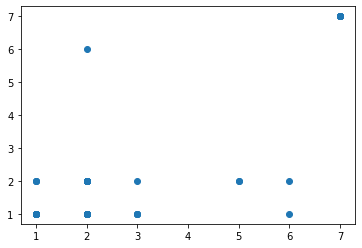

In [ ]:

plt.scatter(y_test,y_pred)

In [ ]:
#evaluation Metrics 
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))  
print('Balanced Accuracy Score:', metrics.balanced_accuracy_score(y_test, y_pred))

Accuracy Score: 0.5925925925925926
Balanced Accuracy Score: 0.3948412698412698
